In [1]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install xlrd

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True, eps=np.finfo(np.float).eps,
/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:167: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method

In [5]:
#----------------Daily wise Data (2020)----------------

In [6]:
df=pd.read_csv("day_wise.csv")
df

,Date,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,No. of countries
0,2020-01-22,555,17,28,510,0,0,0,3.06,5.05,60.71,6
1,2020-01-23,654,18,30,606,99,1,2,2.75,4.59,60.00,8
2,2020-01-24,941,26,36,879,287,8,6,2.76,3.83,72.22,9
3,2020-01-25,1434,42,39,1353,493,16,3,2.93,2.72,107.69,11
4,2020-01-26,2118,56,52,2010,684,14,13,2.64,2.46,107.69,13
...,...,...,...,...,...,...,...,...,...,...,...,...
183,2020-07-23,15510481,633506,8710969,6166006,282756,9966,169714,4.08,56.16,7.27,187
184,2020-07-24,15791645,639650,8939705,6212290,281164,6144,228736,4.05,56.61,7.16,187
185,2020-07-25,16047190,644517,9158743,6243930,255545,4867,219038,4.02,57.07,7.04,187
186,2020-07-26,16251796,648621,9293464,6309711,204606,4104,134721,3.99,57.18,6.98,187


In [7]:
#-----------Data Wrangling---------
df.isnull()

,Date,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,No. of countries
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
183,False,False,False,False,False,False,False,False,False,False,False,False
184,False,False,False,False,False,False,False,False,False,False,False,False
185,False,False,False,False,False,False,False,False,False,False,False,False
186,False,False,False,False,False,False,False,False,False,False,False,False


In [8]:
df["Date"]=pd.to_datetime(df["Date"])
df["year"]=df["Date"].dt.year
df["month"]=df["Date"].dt.month
df["Day"]=df["Date"].dt.month
df

,Date,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,No. of countries,year,month,Day
0,2020-01-22,555,17,28,510,0,0,0,3.06,5.05,60.71,6,2020,1,1
1,2020-01-23,654,18,30,606,99,1,2,2.75,4.59,60.00,8,2020,1,1
2,2020-01-24,941,26,36,879,287,8,6,2.76,3.83,72.22,9,2020,1,1
3,2020-01-25,1434,42,39,1353,493,16,3,2.93,2.72,107.69,11,2020,1,1
4,2020-01-26,2118,56,52,2010,684,14,13,2.64,2.46,107.69,13,2020,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183,2020-07-23,15510481,633506,8710969,6166006,282756,9966,169714,4.08,56.16,7.27,187,2020,7,7
184,2020-07-24,15791645,639650,8939705,6212290,281164,6144,228736,4.05,56.61,7.16,187,2020,7,7
185,2020-07-25,16047190,644517,9158743,6243930,255545,4867,219038,4.02,57.07,7.04,187,2020,7,7
186,2020-07-26,16251796,648621,9293464,6309711,204606,4104,134721,3.99,57.18,6.98,187,2020,7,7


In [9]:
df["month"].replace([1,2,3,4,5,6,7,8,9,10,11,12],['January','February','March',
                                                    'April','May','June','July'
                                                     ,'August','September','October','November','December'],inplace=True)

<BarContainer object of 188 artists>

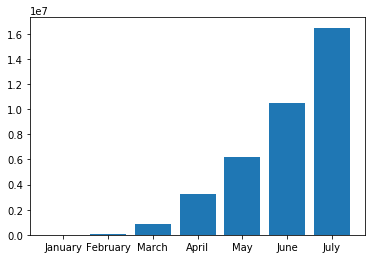

In [10]:
#Confirmed Cases
plt.bar(df["month"],df["Confirmed"])

<BarContainer object of 188 artists>

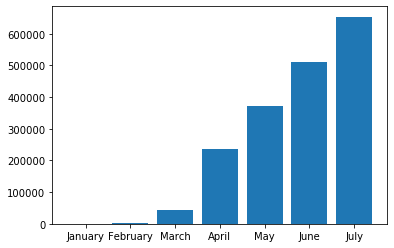

In [11]:
#Deaths 
plt.bar(df["month"],df["Deaths"])

<BarContainer object of 188 artists>

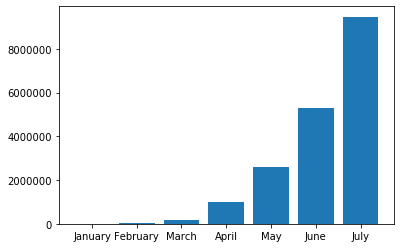

In [12]:
#Recovered
plt.bar(df["month"],df["Recovered"])

<BarContainer object of 188 artists>

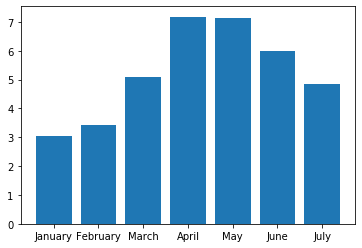

In [13]:
#Deaths / 100 Cases
plt.bar(df["month"],df["Deaths / 100 Cases"])

<BarContainer object of 188 artists>

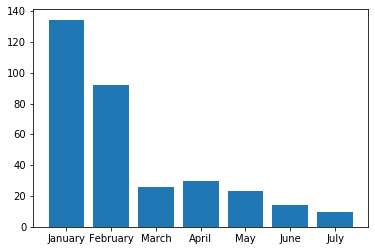

In [14]:
#Deaths / 100 Recovered------------

plt.bar(df["month"],df["Deaths / 100 Recovered"])

<BarContainer object of 188 artists>

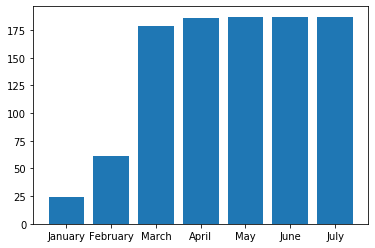

In [15]:
#No. of countries
plt.bar(df["month"],df["No. of countries"])

In [16]:
df.columns

Index(['Date', 'Confirmed', 'Deaths', 'Recovered', 'Active', 'New cases',
       'New deaths', 'New recovered', 'Deaths / 100 Cases',
       'Recovered / 100 Cases', 'Deaths / 100 Recovered', 'No. of countries',
       'year', 'month', 'Day'],
      dtype='object')

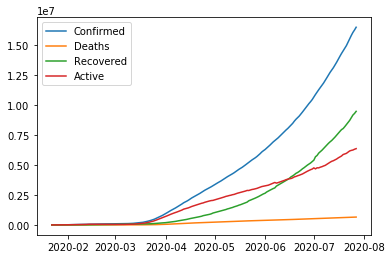

In [17]:
x=df["Date"]
plt.plot(x,df["Confirmed"],label="Confirmed")
plt.plot(x,df["Deaths"],label="Deaths")
plt.plot(x,df["Recovered"],label="Recovered")
plt.plot(x,df["Active"],label="Active")
plt.legend()
plt.show()

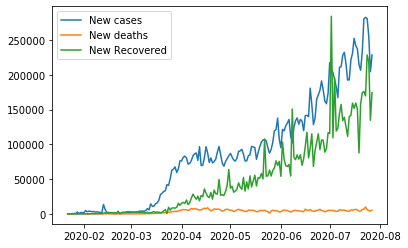

In [18]:
x=df["Date"]
plt.plot(x,df["New cases"],label="New cases")
plt.plot(x,df["New deaths"],label="New deaths")
plt.plot(x,df["New recovered"],label="New Recovered")

plt.legend()
plt.show()

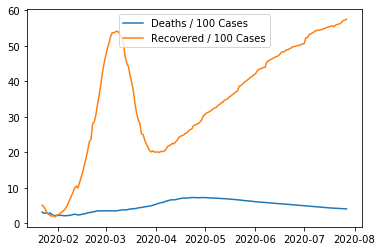

In [19]:
x=df["Date"]
plt.plot(x,df["Deaths / 100 Cases"],label="Deaths / 100 Cases")
plt.plot(x,df["Recovered / 100 Cases"],label="Recovered / 100 Cases")


plt.legend()
plt.show()

(0, 9980158.198117943)

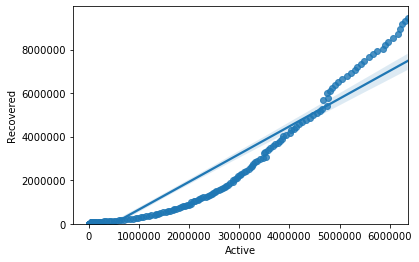

In [20]:
sns.regplot(x=df["Active"],y=df["Recovered"],data=df)
plt.ylim(0,)

(0, 299317.06531421613)

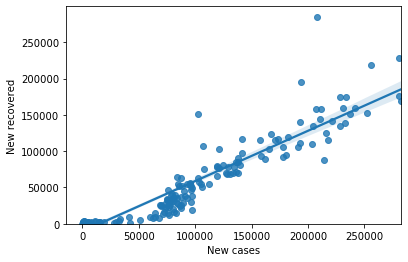

In [21]:
sns.regplot(x=df["New cases"],y=df["New recovered"],data=df)
plt.ylim(0,)

(0, 838873.8831853295)

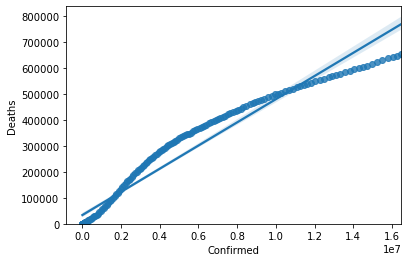

In [22]:
sns.regplot(x=df["Confirmed"],y=df["Deaths"],data=df)
plt.ylim(0,)

In [23]:
dependent_variable='Date'
independent_variables=df.columns.tolist()
independent_variables.remove(dependent_variable)
independent_variables.remove('month')
independent_variables.remove('Day')
independent_variables.remove('year')
independent_variables

['Confirmed',
 'Deaths',
 'Recovered',
 'Active',
 'New cases',
 'New deaths',
 'New recovered',
 'Deaths / 100 Cases',
 'Recovered / 100 Cases',
 'Deaths / 100 Recovered',
 'No. of countries']

In [24]:
x=df[independent_variables].values
y=df[dependent_variable].values

In [25]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=0)

In [26]:
#transforming data
#min-max sclaer(normalization)
scaler=MinMaxScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [27]:
x_train[0:10]

array([[4.87568980e-01, 6.69294361e-01, 3.99634538e-01, 5.98414284e-01,
        4.71859129e-01, 3.38551074e-01, 2.45989718e-01, 6.69260700e-01,
        8.14133766e-01, 4.55916573e-02, 1.00000000e+00],
       [4.72517760e-04, 2.37433010e-04, 1.21591196e-05, 1.17479218e-03,
        7.31372632e-03, 3.81296408e-03, 5.62599774e-05, 7.78210117e-03,
        0.00000000e+00, 9.90088770e-01, 7.73480663e-02],
       [5.41791301e-01, 7.17240412e-01, 4.62538828e-01, 6.40493305e-01,
        5.57201262e-01, 4.26349589e-01, 4.05441043e-01, 6.30350195e-01,
        8.49287903e-01, 3.80935965e-02, 1.00000000e+00],
       [1.52462387e-01, 2.68188294e-01, 6.77719199e-02, 2.65314261e-01,
        2.59372038e-01, 5.46156934e-01, 7.49136761e-02, 9.68871595e-01,
        4.27438255e-01, 1.82883737e-01, 9.83425414e-01],
       [8.79418563e-01, 9.28321441e-01, 8.54853038e-01, 9.10576157e-01,
        8.40424253e-01, 5.64619707e-01, 5.30215124e-01, 4.22178988e-01,
        9.71335857e-01, 1.01697837e-02, 1.00000000e+

In [28]:
#fitting MLR to the training set
regression=LinearRegression()
regression.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [29]:
y_predict=regression.predict(x_test)

In [30]:
y_predict=y_predict.astype("float")
y_test=y_test.astype('double')

In [31]:
mean_squared_error(y_test,y_predict)

2.691240478230908e+28

In [32]:
r2_score(y_test,y_predict)

0.9986434648924857

Text(0.5, 1.0, 'Actual vs. Predicted')

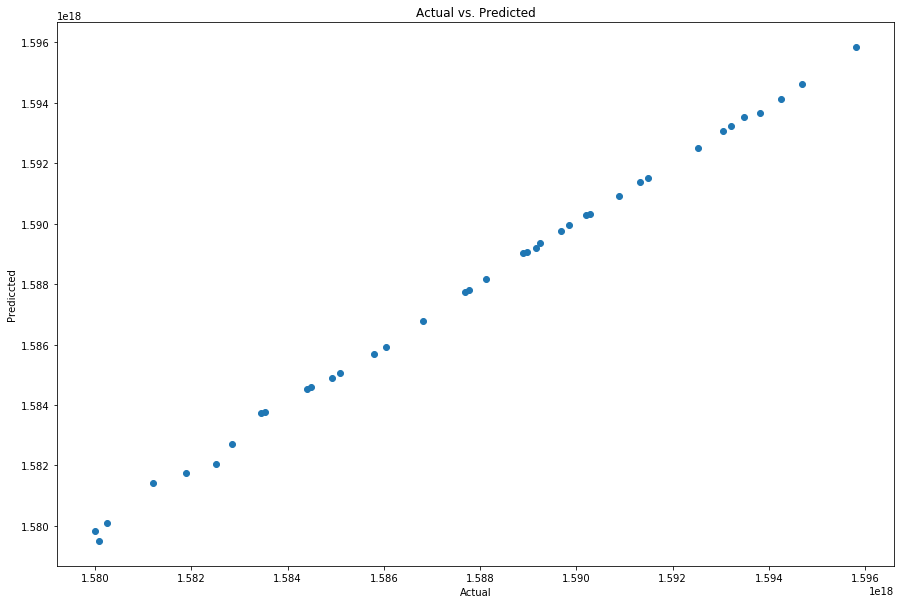

In [33]:
plt.figure(figsize=(15,10))
plt.scatter(y_test,y_predict)
plt.xlabel('Actual')
plt.ylabel('Prediccted')
plt.title('Actual vs. Predicted')

In [34]:
#Difference between Actual value and predicted values

predicted_value=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_predict,'Difference':y_test-y_predict})
predicted_value[0:20].astype('double')

,Actual Value,Predicted Value,Difference
0,1.588896e+18,1.589035e+18,-1.386355e+14
1,1.583539e+18,1.583763e+18,-2.238009e+14
2,1.593475e+18,1.593522e+18,-4.701868e+13
3,1.585094e+18,1.585045e+18,4.985436e+13
4,1.590192e+18,1.590278e+18,-8.613426e+13
5,1.586822e+18,1.586772e+18,5.063754e+13
6,1.581206e+18,1.581413e+18,-2.070668e+14
7,1.589155e+18,1.589206e+18,-5.048218e+13
8,1.593216e+18,1.593232e+18,-1.573213e+13
9,1.580256e+18,1.580088e+18,1.681476e+14


In [35]:
#--------------India----------

In [36]:
#India Dataset(jan-2020 to june-2021)
df=pd.read_excel('covid_19_india (1).xlsx')
df

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,18:00:00,Kerala,1,0,0,0,1
1,2,2020-01-31,18:00:00,Kerala,1,0,0,0,1
2,3,2020-02-01,18:00:00,Kerala,2,0,0,0,2
3,4,2020-02-02,18:00:00,Kerala,3,0,0,0,3
4,5,2020-02-03,18:00:00,Kerala,3,0,0,0,3
...,...,...,...,...,...,...,...,...,...
15549,15550,2021-06-01,08:00:00,Telangana,-,-,540986,3281,578351
15550,15551,2021-06-01,08:00:00,Tripura,-,-,44908,519,51974
15551,15552,2021-06-01,08:00:00,Uttarakhand,-,-,294671,6452,329494
15552,15553,2021-06-01,08:00:00,Uttar Pradesh,-,-,1633947,20497,1691488


In [37]:
df.drop(['Sno'],axis=1,inplace=True)
df.drop(['Time'],axis=1,inplace=True)
df.drop(['Date'],axis=1,inplace=True)

In [38]:
#Data cleaning
df.isna()

,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
15549,False,False,False,False,False,False
15550,False,False,False,False,False,False
15551,False,False,False,False,False,False
15552,False,False,False,False,False,False


In [39]:
df.replace("--",'0',inplace=True)
df.replace("-",'0',inplace=True)

In [40]:
#Total_Cases
df['Total_Cases']=df['ConfirmedIndianNational']+df['ConfirmedForeignNational']
df["Total_Cases"]=df["Total_Cases"].astype("int64")
df["ConfirmedIndianNational"]=df["ConfirmedIndianNational"].astype("int64")
df["ConfirmedForeignNational"]=df["ConfirmedForeignNational"].astype("int64")
total_cases=df["Total_Cases"].sum()
print("Total confirmed cases till date is : ",total_cases)

Total confirmed cases till date is :  6103


In [41]:

df["Total_Active"]=df["Total_Cases"]-(df["Deaths"]+df["Cured"])
df["Total_Active"][df["Total_Active"]<0]=0
total_Active=df["Total_Active"].sum()
print("Total Active cases till date is : ",total_Active)
active=df.groupby('State/UnionTerritory')["Total_Active"].sum().sort_values(ascending=False).to_frame()
active.head().style.background_gradient(cmap='Reds')

Total Active cases till date is :  5508


/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Total_Active
State/UnionTerritory,
Maharashtra,1079
Kerala,1061
Rajasthan,388
Karnataka,365
Uttar Pradesh,356


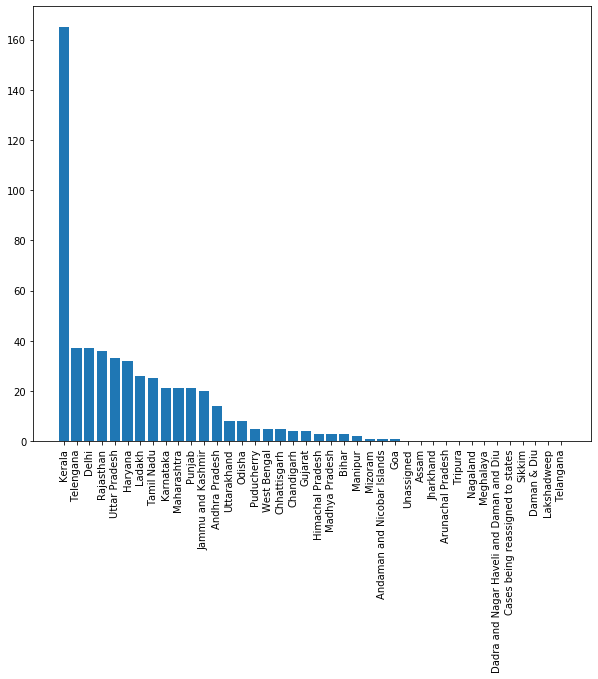

In [42]:
#Total Active
plt.figure(figsize=(10,8))
plt.bar(df["State/UnionTerritory"],df["Total_Active"].sort_values(ascending=False))
plt.xticks(rotation='vertical')

plt.show()

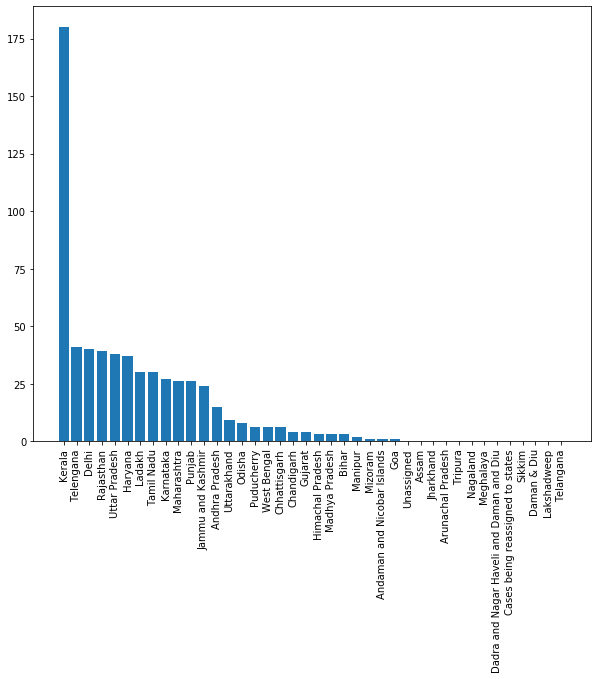

In [43]:
#States that have recorded highest number of cases
#Total Cases
plt.figure(figsize=(10,8))
plt.bar(df["State/UnionTerritory"],df["Total_Cases"].sort_values(ascending=False))
plt.xticks(rotation='vertical')
plt.show()

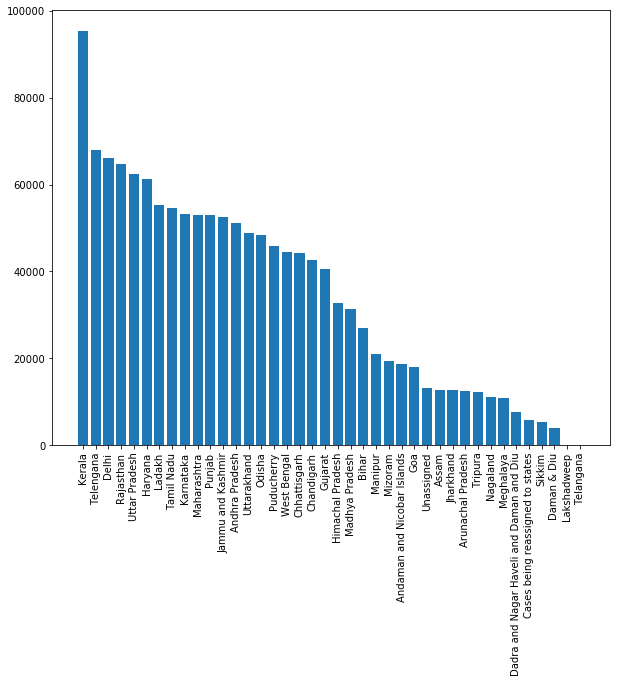

In [44]:
plt.figure(figsize=(10,8))
plt.bar(df["State/UnionTerritory"],df["Deaths"].sort_values(ascending=False))
plt.xticks(rotation='vertical')
plt.show()

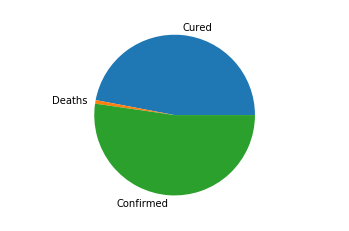

In [45]:
#summary of all states in India
values=[df["Cured"].sum(),df["Deaths"].sum(),df["Confirmed"].sum()]
label=["Cured","Deaths","Confirmed"]
plt.axis("equal")
plt.pie(values,labels=label,radius=0.6)
plt.show()

In [46]:

vaccination=pd.read_csv("covid_vaccine_statewise.csv")
vaccination

,Updated On,State,Total Individuals Vaccinated,Total Sessions Conducted,Total Sites,First Dose Administered,Second Dose Administered,Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Covaxin Administered,Total CoviShield Administered,Total Sputnik V Administered,AEFI,18-45 years (Age),45-60 years (Age),60+ years (Age),Total Doses Administered
0,16/01/2021,India,48276.0,3455.0,2957.0,48276.0,0.0,23757.0,24517.0,2.0,579.0,47697.0,NaN,NaN,NaN,NaN,NaN,48276.0
1,17/01/2021,India,58604.0,8532.0,4954.0,58604.0,0.0,27348.0,31252.0,4.0,635.0,57969.0,NaN,NaN,NaN,NaN,NaN,58604.0
2,18/01/2021,India,99449.0,13611.0,6583.0,99449.0,0.0,41361.0,58083.0,5.0,1299.0,98150.0,NaN,NaN,NaN,NaN,NaN,99449.0
3,19/01/2021,India,195525.0,17855.0,7951.0,195525.0,0.0,81901.0,113613.0,11.0,3017.0,192508.0,NaN,NaN,NaN,NaN,NaN,195525.0
4,20/01/2021,India,251280.0,25472.0,10504.0,251280.0,0.0,98111.0,153145.0,24.0,3946.0,247334.0,NaN,NaN,NaN,NaN,NaN,251280.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5139,30/05/2021,West Bengal,10547015.0,381157.0,1170.0,10547015.0,3865954.0,5871662.0,4674095.0,1258.0,1625834.0,12787135.0,0.0,1100.0,2202804.0,4404252.0,3938023.0,14412969.0
5140,31/05/2021,West Bengal,10838457.0,839415.0,2511.0,10838457.0,3879678.0,6050228.0,4786796.0,1433.0,1650999.0,13067136.0,0.0,1144.0,2402085.0,4469534.0,3964698.0,14718135.0
5141,01/06/2021,West Bengal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5142,02/06/2021,West Bengal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [47]:
vaccination.fillna(0)


,Updated On,State,Total Individuals Vaccinated,Total Sessions Conducted,Total Sites,First Dose Administered,Second Dose Administered,Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Covaxin Administered,Total CoviShield Administered,Total Sputnik V Administered,AEFI,18-45 years (Age),45-60 years (Age),60+ years (Age),Total Doses Administered
0,16/01/2021,India,48276.0,3455.0,2957.0,48276.0,0.0,23757.0,24517.0,2.0,579.0,47697.0,0.0,0.0,0.0,0.0,0.0,48276.0
1,17/01/2021,India,58604.0,8532.0,4954.0,58604.0,0.0,27348.0,31252.0,4.0,635.0,57969.0,0.0,0.0,0.0,0.0,0.0,58604.0
2,18/01/2021,India,99449.0,13611.0,6583.0,99449.0,0.0,41361.0,58083.0,5.0,1299.0,98150.0,0.0,0.0,0.0,0.0,0.0,99449.0
3,19/01/2021,India,195525.0,17855.0,7951.0,195525.0,0.0,81901.0,113613.0,11.0,3017.0,192508.0,0.0,0.0,0.0,0.0,0.0,195525.0
4,20/01/2021,India,251280.0,25472.0,10504.0,251280.0,0.0,98111.0,153145.0,24.0,3946.0,247334.0,0.0,0.0,0.0,0.0,0.0,251280.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5139,30/05/2021,West Bengal,10547015.0,381157.0,1170.0,10547015.0,3865954.0,5871662.0,4674095.0,1258.0,1625834.0,12787135.0,0.0,1100.0,2202804.0,4404252.0,3938023.0,14412969.0
5140,31/05/2021,West Bengal,10838457.0,839415.0,2511.0,10838457.0,3879678.0,6050228.0,4786796.0,1433.0,1650999.0,13067136.0,0.0,1144.0,2402085.0,4469534.0,3964698.0,14718135.0
5141,01/06/2021,West Bengal,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5142,02/06/2021,West Bengal,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


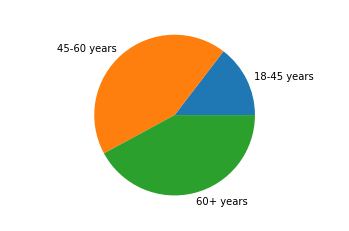

In [48]:
values_v=[vaccination["18-45 years (Age)"].sum(),vaccination["45-60 years (Age)"].sum(),vaccination["60+ years (Age)"].sum()]
vaccine=["18-45 years","45-60 years","60+ years"]
plt.axis("equal")
plt.pie(values_v,labels=vaccine,radius=0.6)
plt.show()

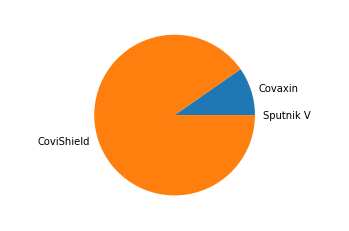

In [49]:
values_v=[vaccination["Total Covaxin Administered"].sum(),vaccination["Total CoviShield Administered"].sum(),vaccination["Total Sputnik V Administered"].sum()]
vaccine=["Covaxin","CoviShield","Sputnik V"]
plt.axis("equal")
plt.pie(values_v,labels=vaccine,radius=0.6)
plt.show()


In [50]:
#karnataka vaccination data

In [51]:
tests_k=pd.read_excel('karnataka test.xlsx')
tests_k

,Date,State,TotalSamples,Negative,Positive
0,2020-04-07,Karnataka,6580,5942.0,175.0
1,2020-04-08,Karnataka,6967,6473.0,181.0
2,2020-04-09,Karnataka,7613,7176.0,197.0
3,2020-04-10,Karnataka,7975,7673.0,207.0
4,2020-04-11,Karnataka,8560,8231.0,215.0
...,...,...,...,...,...
414,2021-05-27,Karnataka,29198945,NaN,NaN
415,2021-05-28,Karnataka,29339728,NaN,NaN
416,2021-05-29,Karnataka,29475822,NaN,NaN
417,2021-05-30,Karnataka,29614631,NaN,NaN


In [52]:
tests_k["year"]=tests_k["Date"].dt.year
tests_k["month"]=tests_k["Date"].dt.month

In [53]:
tests_k["month"].replace([1,2,3,4,5,6,7,8,9,10,11,12],['January','February','March',
'April','May','June','July'
,'August','September','October','November','December'],inplace=True)


In [54]:
tests_k.fillna(0)

,Date,State,TotalSamples,Negative,Positive,year,month
0,2020-04-07,Karnataka,6580,5942.0,175.0,2020,April
1,2020-04-08,Karnataka,6967,6473.0,181.0,2020,April
2,2020-04-09,Karnataka,7613,7176.0,197.0,2020,April
3,2020-04-10,Karnataka,7975,7673.0,207.0,2020,April
4,2020-04-11,Karnataka,8560,8231.0,215.0,2020,April
...,...,...,...,...,...,...,...
414,2021-05-27,Karnataka,29198945,0.0,0.0,2021,May
415,2021-05-28,Karnataka,29339728,0.0,0.0,2021,May
416,2021-05-29,Karnataka,29475822,0.0,0.0,2021,May
417,2021-05-30,Karnataka,29614631,0.0,0.0,2021,May


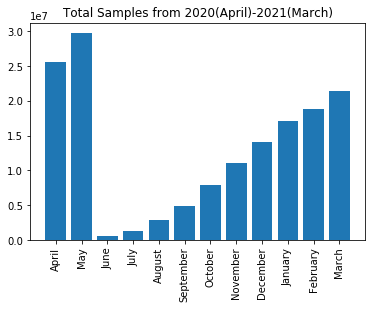

In [55]:
plt.bar(tests_k["month"],tests_k["TotalSamples"])
plt.xticks(rotation='vertical')
plt.title('Total Samples from 2020(April)-2021(March)')
plt.show()


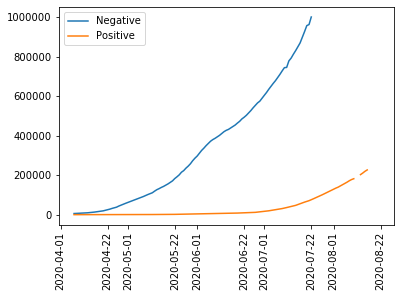

In [56]:
x=tests_k["Date"]
plt.plot(x,tests_k["Negative"],label="Negative")
plt.plot(x,tests_k["Positive"],label="Positive")
plt.xticks(rotation='vertical')
plt.legend()
plt.show()